In [11]:
!pip3 install -U scikit-learn
!pip install pandas
!pip install matplotlib
!pip install numpy

In [8]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [1]:
!python -c "import sklearn; print(sklearn.__version__)"

1.5.2


In [3]:
import sklearn

### Импорт необходимых библиотек

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

### Работа с данными

#### Описание датасета

Директории train и test - данные для обучения и прогнозирования соответственно

Каждая директория содержит 10 файлов. 9 файлов вида B**.csv - значения каналов, файл NDVI.csv - рассчитанное значение индекса NDVI.

Каждый файл содержит 26 числовых столбцов со значениями каналов в k-ый день от начала года. Также данные для обучения содержат столбец culture с названием выращиваемой культуры.

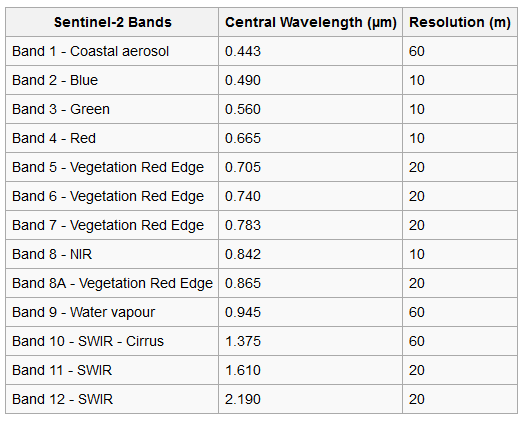

In [4]:
df_ndvi = pd.read_csv("train/NDVI.csv", sep=",", encoding="windows-1251")
df_ndvi

,index,121,128,135,142,149,156,163,170,177,...,240,247,254,261,268,275,282,289,296,culture
0,0,0.254240,0.232287,0.249031,0.254652,0.254277,0.356323,0.302102,0.261997,0.293335,...,0.894537,0.812989,0.774184,0.799167,0.401241,0.698070,0.606920,0.464309,0.219973,овощи
1,1,0.226222,0.267632,0.287176,0.212295,0.193222,0.219783,0.300802,0.356491,0.443714,...,0.966233,0.888220,0.746115,0.586382,0.482687,0.421582,0.351218,0.386176,0.204179,соя
2,2,0.196713,0.185725,0.140135,0.191388,0.163758,0.373368,0.302102,0.195013,0.231862,...,0.867848,0.767680,0.720085,0.754460,0.401241,0.669038,0.617806,0.473122,0.186096,овощи
3,3,0.186567,0.115344,0.144401,0.159283,0.136875,0.175118,0.302102,0.188756,0.220256,...,0.880614,0.793155,0.748762,0.766150,0.401241,0.661527,0.593088,0.443025,0.174717,овощи
4,4,0.218304,0.214468,0.212592,0.264833,0.251726,0.221614,0.234553,0.260465,0.317564,...,0.954771,0.871288,0.783862,0.670257,0.591231,0.472619,0.413395,0.260998,0.304659,соя
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7256,7256,0.222204,0.366755,0.416019,0.492805,0.594604,0.599010,0.633682,0.696815,0.690494,...,0.350263,0.227916,0.213425,0.234438,0.241185,0.269073,0.259804,0.237961,0.210356,многолетние травы
7257,7257,0.228732,0.250963,0.209191,0.214873,0.346914,NaN,0.844386,0.859159,0.916495,...,0.746952,0.328692,0.183729,0.328963,0.380743,0.659754,0.705170,0.813621,0.732769,зерновые
7258,7258,0.264827,0.281921,0.379812,0.501459,0.561454,0.596438,0.661847,0.757240,0.813503,...,0.853472,0.861634,0.849288,0.836953,0.895247,0.837876,0.704020,0.734517,0.710137,многолетние травы
7259,7259,0.202214,0.183071,0.203261,0.210875,0.174432,0.174103,0.193671,NaN,0.304666,...,0.870038,NaN,0.493749,0.208369,0.209012,NaN,0.193111,NaN,0.153004,кукуруза


In [5]:
df_ndvi = df_ndvi.drop(columns=["index"])

In [6]:
df_ndvi.isna().sum()

121        610
128        545
135        583
142        578
149        587
156        583
163        601
170        566
177        608
184        579
191        604
198        632
205        572
212        591
219        611
226        589
233        575
240        591
247        555
254        595
261        548
268        583
275        532
282        601
289        596
296        572
culture      0
dtype: int64

##### Построим усреднённый график значений NDVI культур
> По этому графику можно сделать выводы какие культуры похожи своими графиками, помогает заметить выбросы и ещё многое другое. Далее Вы можете использовать это для модификации модели.

['овощи', 'соя', 'кукуруза', 'залежь', 'многолетние травы', 'зерновые']


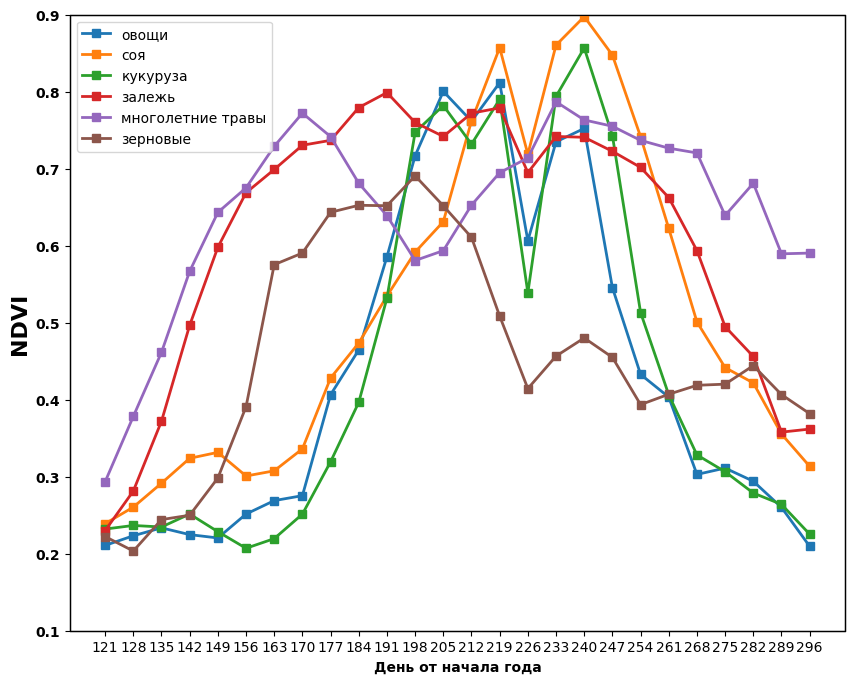

In [7]:
cul = list(df_ndvi['culture'].unique().tolist())
print(cul)
fig, ax = plt.subplots(figsize=(10,8))

plt.yticks(fontsize=10)

ax.set_xlabel('День от начала года',fontsize = 10,fontweight="bold")
ax.set_ylabel('NDVI',fontsize = 16,fontweight="bold")
ax.patch.set_edgecolor('black')

ax.patch.set_linewidth(1)
plt.ylim([0.1, 0.9])


xx = ['121', '128', '135', '142', '149', '156', '163', '170', '177', '184', '191', '198', '205', '212', '219', '226', '233', '240', '247', '254', '261', '268', '275', '282', '289', '296']
colors = plt.cm.coolwarm(np.array(len(cul)))
for i in range(len(cul)):
    p = df_ndvi.loc[(df_ndvi['culture'] == cul[i])].drop(columns=['culture']).mean()
    ax.plot(xx, p.values.tolist(), label=cul[i], linestyle = '-', marker = 's', markersize = 6, linewidth = 2)
plt.yticks(size=10, fontweight="bold")
leg = ax.legend(fontsize=10, loc ='upper left')

plt.show()

#### Сконструируем новые признаки

Иногда при помощи конструирования новых признаков на основе существующих можно добиться улучшения эффективности модели.

Попробуем сконструировать новый признак по формулам:

$NDWI = \frac{NIR - SWIR}{NIR + SWIR}$

<br>

$NEW\_FEATURE = NDVI * NDWI$

In [8]:
df_nir = pd.read_csv("train/B8A.csv", sep=',', encoding="windows-1251")
df_swir = pd.read_csv("train/B12.csv", sep=',', encoding="windows-1251")

In [9]:
df_nir

,index,121,128,135,142,149,156,163,170,177,...,240,247,254,261,268,275,282,289,296,culture
0,0,1489.513611,7368.0,776.0,4454.491223,1814.783509,1221.279065,2992.0,2919.0,5364.833645,...,3336.0,3209.771979,4645.337283,2694.309466,2276.0,2244.0,1660.288519,6647.745265,3097.550474,овощи
1,1,2640.593016,5654.0,1869.0,4089.731549,3910.805097,2574.624888,4103.0,3304.0,3260.491687,...,4998.0,5412.041216,3460.757697,2816.856786,2141.0,2121.0,1041.288163,7060.209085,1902.701920,соя
2,2,1536.015919,7412.0,965.0,5130.550724,2340.284981,2122.847873,2480.0,3355.0,4852.244926,...,3483.0,2739.220547,4664.222870,2666.268986,2521.0,2229.0,1502.728961,6560.556054,4869.881200,овощи
3,3,1503.462955,7428.0,984.0,5068.642455,2386.563080,2135.130756,3012.0,3341.0,5461.260329,...,3424.0,3173.491722,4745.573239,2859.022414,2268.0,2317.0,1434.208340,6431.118377,4473.871447,овощи
4,4,1907.799729,7179.0,912.0,4559.867671,1910.855367,961.986316,7104.0,2894.0,9567.283531,...,4541.0,5481.617220,4294.151136,2820.502901,2468.0,348.0,835.838215,5251.116761,4187.381678,соя
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7256,7256,2529.713714,7659.0,2917.0,4765.218824,1900.833054,2516.224945,3464.0,2901.0,2835.509974,...,3805.0,1683.834331,3137.609954,2179.282699,2200.0,391.0,1106.832814,5666.825376,3772.100611,многолетние травы
7257,7257,1898.333611,7374.0,2026.0,4440.807933,2476.062633,NaN,4955.0,6257.0,6248.794344,...,4202.0,1898.336073,3790.944122,1972.579577,1728.0,2161.0,1820.458407,6048.440465,3621.566402,зерновые
7258,7258,3306.259727,6173.0,2939.0,4324.468427,3767.464928,3124.805454,3881.0,3490.0,3827.316604,...,4159.0,4015.349906,4260.521074,4817.676421,3667.0,4604.0,2929.235799,5206.906707,6356.862349,многолетние травы
7259,7259,2510.726082,5628.0,2140.0,4468.397950,1826.438295,2447.500407,5038.0,NaN,3652.126136,...,4485.0,NaN,7075.225056,3013.750420,1744.0,NaN,942.074387,NaN,1586.000618,кукуруза


In [10]:
df_swir = df_swir.drop(columns=["index"])
df_nir = df_nir.drop(columns=["index"])

In [11]:
df_ndvi = df_ndvi.dropna()
df_swir = df_swir.dropna()
df_nir = df_nir.dropna()

In [12]:
df_features = df_ndvi.copy()

for day in xx:
    df_features[f"{day}_NDWI"] = (df_nir[day] - df_swir[day]) / (df_nir[day] + df_swir[day])
    df_features[f"{day}_NEW"] = df_ndvi[day] * df_features[f"{day}_NDWI"]

#### Сформируем датасет
>
> X - матрица признаков
> Y - матрица ответов

* При формировании матрицы ответов используем методику OneHotEncoding. Столбец ответа (названия культуры) конвертируется в несколько столбцов вида "Это культура K?". В каждой строке только в одном из столбцов есть значение 1 - показатель принадлежности к классу


+ Обе матрицы разделяются на две части - train и test. Это делается для того, чтобы при обучении модель оценивалась на других данных и не "заучивала" данные. Без этого на "боевых" данных модель будет работать плохо.

In [13]:
encoder = OneHotEncoder()

x = df_features.drop(columns=["culture"])
y = pd.DataFrame(encoder.fit_transform(df_features[['culture']]).toarray(), columns=encoder.get_feature_names_out(['culture']))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Обучение моделей

#### 1. Random Forest

Алгоритм случайного леса (Random Forest) — универсальный алгоритм машинного обучения, суть которого состоит в использовании ансамбля решающих деревьев. Само по себе решающее дерево предоставляет крайне невысокое качество классификации, но из-за большого их количества результат значительно улучшается. Также это один из немногих алгоритмов, который можно использовать в абсолютном большинстве задач.

Нормализация данных является важным шагом в предобработке данных для машинного обучения. Она включает в себя масштабирование значений признаков в определенный диапазон. Это помогает увеличить численную стабильность и уравнить влияние признаков

In [20]:
normalizer = Normalizer()

In [21]:
model = RandomForestClassifier()

In [22]:
pipeline = Pipeline([
    ("norm", normalizer),
    ("model", model)
])

In [32]:
epochs = 500
for epoch in range(1, epochs + 1):
    print(f"epoch № {epoch}")
    pipeline.fit(x_train, y_train)
    clear_output(True)

epoch № 500


In [33]:
with open("model.pkl", 'wb') as file:
    pickle.dump(pipeline, file)

In [34]:
with open('model.pkl', 'rb') as file:
    pipeline = pickle.load(file)

In [35]:
ans = pipeline.predict(x_test)
pred_ans = np.zeros_like(ans).astype("int32")
pred_ans[np.arange(len(ans)), ans.argmax(1)] = 1

In [41]:
print(classification_report(y_test, pred_ans))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       113
           1       1.00      0.96      0.98       113
           2       1.00      0.96      0.98       109
           3       1.00      0.96      0.98        70
           4       1.00      0.95      0.98        42
           5       0.94      0.96      0.95        78

   micro avg       0.96      0.96      0.96       525
   macro avg       0.97      0.96      0.97       525
weighted avg       0.97      0.96      0.96       525
 samples avg       0.96      0.96      0.96       525



#### Запишем спрогнозированные ответы

In [42]:
df_ndvi_test = pd.read_csv("test/NDVI.csv", sep=";", encoding="windows-1251").drop(columns=["index"])
df_nir_test = pd.read_csv("test/B8A.csv", sep=';', encoding="windows-1251").drop(columns=["index"])
df_swir_test = pd.read_csv("test/B12.csv", sep=';', encoding="windows-1251").drop(columns=["index"])
df_ndvi_test = df_ndvi_test.dropna()
df_swir_test = df_swir_test.dropna()
df_nir_test = df_nir_test.dropna()

df_features_test = df_ndvi_test.copy()
for day in xx:
    df_features_test[f"{day}_NDWI"] = (df_nir_test[day] - df_swir_test[day]) / (df_nir_test[day] + df_swir_test[day])
    df_features_test[f"{day}_NEW"] = df_ndvi_test[day] * df_features_test[f"{day}_NDWI"]
df_features_test

,121,128,135,142,149,156,163,170,177,184,...,268_NDWI,268_NEW,275_NDWI,275_NEW,282_NDWI,282_NEW,289_NDWI,289_NEW,296_NDWI,296_NEW
0,0.213018,0.230446,0.303903,0.173095,0.151930,0.190555,0.328331,0.437798,0.569526,0.626564,...,0.219697,0.087643,0.365777,0.154050,0.160527,0.079480,0.386525,0.210772,0.193453,0.091241
1,0.309530,0.369100,0.400000,0.372085,0.386096,0.274586,0.290695,0.348657,0.497911,0.488456,...,0.373747,0.198444,0.198423,0.082964,-0.039380,-0.019688,0.386962,0.171384,-0.067542,-0.021009
2,0.271320,0.229156,0.259762,0.316141,0.369299,0.204815,0.170110,0.220554,0.369993,0.514363,...,0.047570,0.015308,-0.028286,-0.006698,-0.399009,-0.066858,0.384000,0.065533,-0.202771,-0.032171
3,0.223360,0.278723,0.328947,0.425505,0.313296,0.218796,0.237562,0.239035,0.322100,0.435759,...,0.305470,0.173041,0.093916,0.043580,-0.384633,-0.143657,0.365860,0.129938,-0.090344,-0.028774
4,0.339012,0.524221,0.598435,0.716542,0.819377,0.839105,0.847640,0.881788,0.886416,0.772129,...,0.498496,0.389382,0.399937,0.257852,0.410045,0.300994,0.382976,0.265363,0.213421,0.145860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,0.250261,0.215942,0.219911,0.248816,0.208965,0.219017,0.231964,0.238326,0.325788,0.395572,...,0.328985,0.188253,0.059946,0.024530,-0.457861,-0.147305,0.358569,0.107600,-0.114224,-0.029327
1615,0.334547,0.441795,0.517857,0.651591,0.748780,0.804917,0.833903,0.904638,0.937234,0.837769,...,0.650006,0.563267,0.569038,0.431950,0.591251,0.514173,0.304109,0.242133,0.362292,0.291670
1616,0.265411,0.230552,0.261178,0.279697,0.299998,0.228287,0.203368,0.235698,0.303335,0.467449,...,0.071499,0.023953,0.096043,0.022742,-0.386825,-0.070133,0.354782,0.060917,-0.214969,-0.032052
1617,0.228872,0.223688,0.240998,0.207173,0.171777,0.206029,0.265562,0.279434,0.361809,0.503115,...,0.094519,0.034035,0.020552,0.007479,-0.396035,-0.132643,0.373753,0.117105,-0.148399,-0.035247


In [43]:
x = df_features_test

ans_test = pipeline.predict(x)
pred_ans_test = np.zeros_like(ans_test).astype("int32")
pred_ans_test[np.arange(len(ans_test)), ans_test.argmax(1)] = 1

Формат ответа:
Первая строка состоит из одного слова "culture"
На каждой следующей строке названия культуры для спрогнозированных данных в том же порядке, что и тестовых данных.

In [44]:
with open("classification_openset.csv", encoding="windows-1251", mode="w") as file:
    file.write("culture\n")
    for row in encoder.inverse_transform(pred_ans_test):
        file.write(f"{row[0]}\n")

In [45]:
data = pd.read_csv("classification_openset.csv", sep=',', encoding="windows-1251")
data

,culture
0,зерновые
1,кукуруза
2,кукуруза
3,кукуруза
4,многолетние травы
...,...
1614,кукуруза
1615,многолетние травы
1616,кукуруза
1617,соя
